In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
from scipy import stats
sys.path.append('../../shared')
sys.path.append('..')
from input import Info
import hilc_analytic

In [3]:
font = {'size'   : 20, 'family':'STIXGeneral'}
plt.rcParams.update({
     'text.usetex': True,
     'font.family': 'serif',
     'font.sans-serif': ['Computer Modern'],
     'font.size':20})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

### Run weight_computation_variants.py before running this notebook

# Set up Info object from yaml file

In [5]:
# main input file containing most specifications 
input_file = '/Users/kristen/Documents/GitHub/NILC-Inference-Pipeline/harmonic_ILC_pipeline/laptop.yaml'

# read in the input file and set up relevant info object
inp = Info(input_file)
inp.ell_sum_max = inp.ellmax

ells = np.arange(inp.ellmax+1)
res = stats.binned_statistic(ells[2:], ells[2:], statistic='mean', bins=inp.Nbins)
mean_ells = np.round((res[1][:-1]+res[1][1:])/2)


/Users/kristen/Documents/GitHub/NILC-Inference-Pipeline/harmonic_ILC_pipeline/tests/../input.py:70: UserWarning: Output directory is not empty! For safety, make sure to use an output directory that only contains outputs from this pipeline (and other pipelines in the repo) since files will be written and deleted.
  warnings.warn("Output directory is not empty! For safety, make sure to use an output directory that only contains outputs from this pipeline (and other pipelines in the repo) since files will be written and deleted.")


# Load pickle files

In [90]:
#'HILC_tests_high_noise_keepcentralell' or 'HILC_tests_low_noise_keepcentralell' 
# or 'HILC_tests_high_noise_omitcentralell' or 'HILC_tests_high_noise_keepcentralell_gaussian'
HILC_dir = 'HILC_tests_high_noise_omitcentralell' 
Clpq_weights_once_analytic = pickle.load(open(f'{inp.output_dir}/{HILC_dir}/Clpq_weights_once_analytic.p', 'rb'))
Clpq_weights_once_sims = pickle.load(open(f'{inp.output_dir}/{HILC_dir}/Clpq_weights_once_sims.p', 'rb'))
Clpq_weights_vary_analytic = pickle.load(open(f'{inp.output_dir}/{HILC_dir}/Clpq_weights_vary_analytic.p', 'rb'))
Clpq_weights_vary_sims = pickle.load(open(f'{inp.output_dir}/{HILC_dir}/Clpq_weights_vary_sims.p', 'rb'))



# Compare Spectra

In [91]:
def plot_all_spectra(Clpq, title):
    #Clpq has shape (Nsims, N_preserved_comps=2, N_preserved_comps=2, Nbins)
    plt.clf()
    fig, axs = plt.subplots(1,3, figsize=(9,5))
    ax = 0
    for p,q in [(0,0), (0,1), (1,1)]:
        plt.axes(axs[ax])
        for sim in range(len(Clpq)):
            plt.plot(mean_ells, Clpq[sim,p,q], alpha=0.2)
        plt.plot(mean_ells, np.mean(Clpq[:,p,q], axis=0), color='k', linewidth=1.)
        plt.grid()
        plt.xlabel(r'$\ell$')
        if ax==0: plt.ylabel(r'$C_\ell^{TT}$')
        if ax==1: plt.ylabel(r'$C_\ell^{Ty}$')
        if ax==2: plt.ylabel(r'$C_\ell^{yy}$')
        ax += 1
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    return

<Figure size 640x480 with 0 Axes>

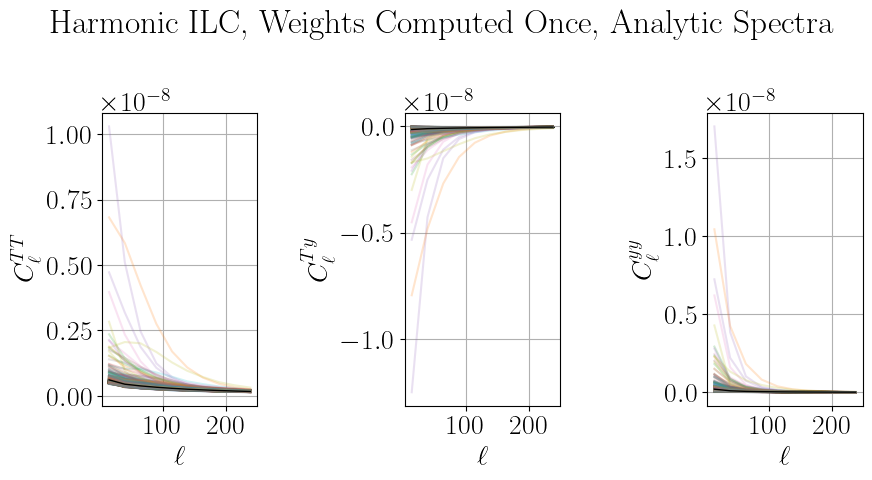

In [92]:
plot_all_spectra(Clpq_weights_once_analytic, 'Harmonic ILC, Weights Computed Once, Analytic Spectra')

<Figure size 640x480 with 0 Axes>

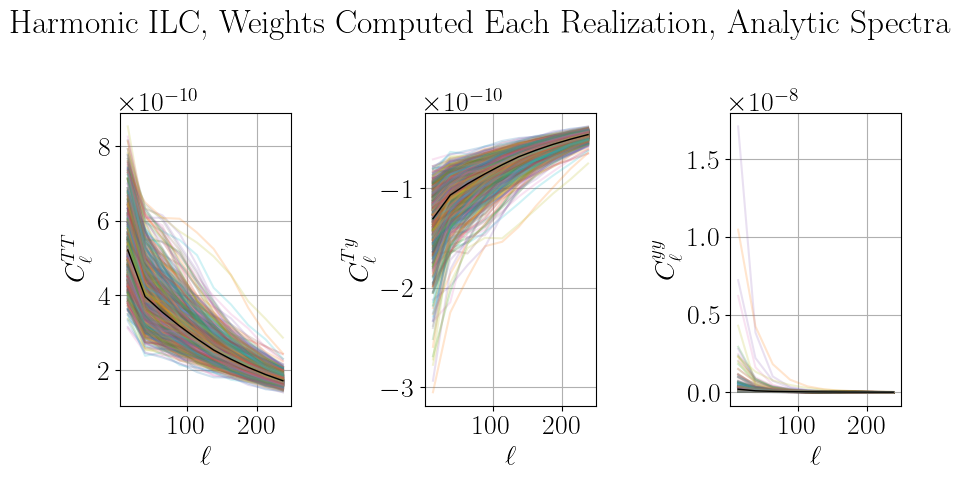

In [93]:
plot_all_spectra(Clpq_weights_vary_analytic, 'Harmonic ILC, Weights Computed Each Realization, Analytic Spectra')

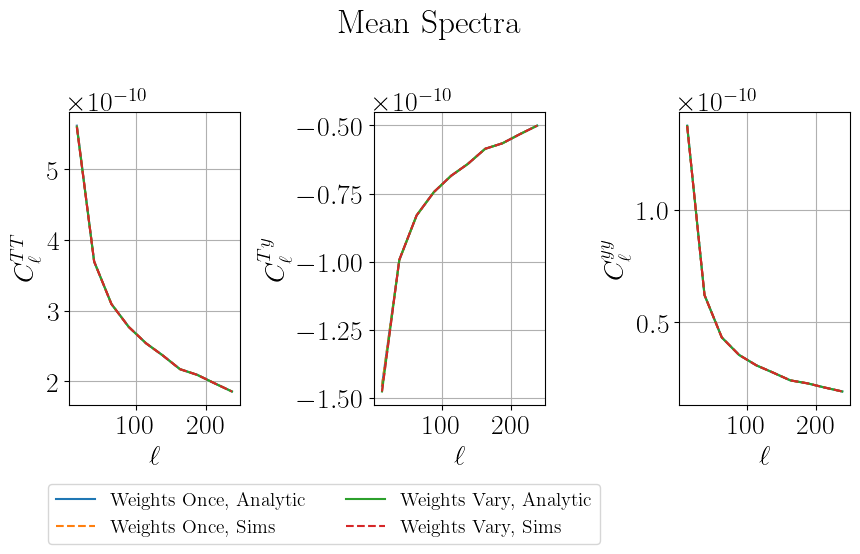

In [56]:
fig, axs = plt.subplots(1,3, figsize=(9,5))
ax = 0
for p,q in [(0,0), (0,1), (1,1)]:
    plt.axes(axs[ax])
    plt.plot(mean_ells, np.mean(Clpq_weights_once_analytic[:,p,q], axis=0), label='Weights Once, Analytic')
    plt.plot(mean_ells, np.mean(Clpq_weights_once_sims[:,p,q], axis=0), label='Weights Once, Sims', linestyle='dashed')
    plt.plot(mean_ells, np.mean(Clpq_weights_vary_analytic[:,p,q], axis=0), label='Weights Vary, Analytic')
    plt.plot(mean_ells, np.mean(Clpq_weights_vary_sims[:,p,q], axis=0), label='Weights Vary, Sims', linestyle='dashed')
    plt.grid()
    plt.xlabel(r'$\ell$')
    if ax==0: plt.ylabel(r'$C_\ell^{TT}$')
    if ax==1: plt.ylabel(r'$C_\ell^{Ty}$')
    if ax==2: plt.ylabel(r'$C_\ell^{yy}$')
    ax += 1
plt.suptitle('Mean Spectra')
handles, labels = axs[-1].get_legend_handles_labels() 
fig.legend(handles, labels, fontsize=14, bbox_to_anchor=(0.7, 0.05), ncol=2)
plt.tight_layout()

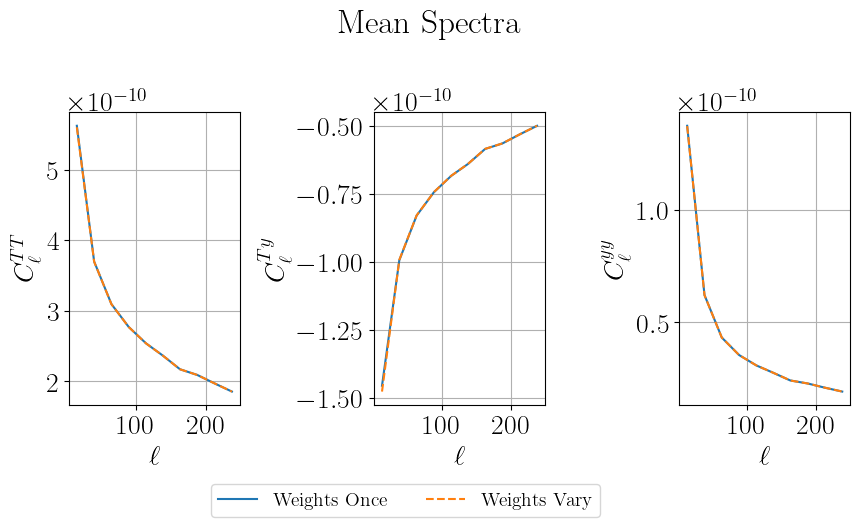

In [57]:
fig, axs = plt.subplots(1,3, figsize=(9,5))
ax = 0
for p,q in [(0,0), (0,1), (1,1)]:
    plt.axes(axs[ax])
    plt.plot(mean_ells, np.mean(Clpq_weights_once_analytic[:,p,q], axis=0), label='Weights Once')
    plt.plot(mean_ells, np.mean(Clpq_weights_vary_analytic[:,p,q], axis=0), label='Weights Vary', linestyle='dashed')
    plt.grid()
    plt.xlabel(r'$\ell$')
    if ax==0: plt.ylabel(r'$C_\ell^{TT}$')
    if ax==1: plt.ylabel(r'$C_\ell^{Ty}$')
    if ax==2: plt.ylabel(r'$C_\ell^{yy}$')
    ax += 1
plt.suptitle('Mean Spectra')
handles, labels = axs[-1].get_legend_handles_labels() 
fig.legend(handles, labels, fontsize=14, bbox_to_anchor=(0.7, 0.05), ncol=2)
plt.tight_layout()

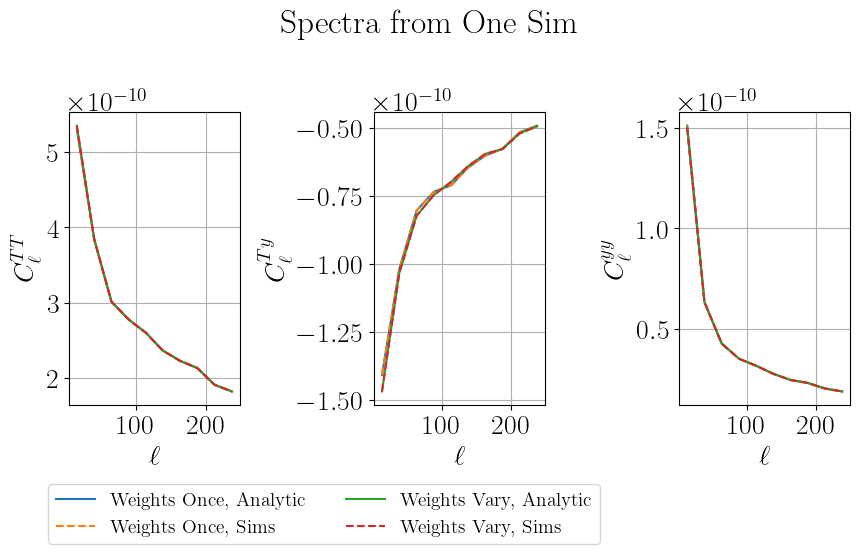

In [58]:
sim = 1
fig, axs = plt.subplots(1,3, figsize=(9,5))
ax = 0
for p,q in [(0,0), (0,1), (1,1)]:
    plt.axes(axs[ax])
    plt.plot(mean_ells, Clpq_weights_once_analytic[sim,p,q], label='Weights Once, Analytic')
    plt.plot(mean_ells, Clpq_weights_once_sims[sim,p,q], label='Weights Once, Sims', linestyle='dashed')
    plt.plot(mean_ells, Clpq_weights_vary_analytic[sim,p,q], label='Weights Vary, Analytic')
    plt.plot(mean_ells, Clpq_weights_vary_sims[sim,p,q], label='Weights Vary, Sims', linestyle='dashed')
    plt.grid()
    plt.xlabel(r'$\ell$')
    if ax==0: plt.ylabel(r'$C_\ell^{TT}$')
    if ax==1: plt.ylabel(r'$C_\ell^{Ty}$')
    if ax==2: plt.ylabel(r'$C_\ell^{yy}$')
    ax += 1
plt.suptitle('Spectra from One Sim')
handles, labels = axs[-1].get_legend_handles_labels() 
fig.legend(handles, labels, fontsize=14, bbox_to_anchor=(0.7, 0.05), ncol=2)
plt.tight_layout()



# Compare Covariance

In [59]:
def get_PScov_sim(inp, Clpq):
    '''
    ARGUMENTS
    ---------
    inp: Info object containing input paramter specifications
    Clpq: (Nsims, N_preserved_comps=2, N_preserved_comps=2, Nbins) ndarray 
        containing binned auto- and cross-spectra of harmonic ILC maps p and q
        dim3: index0 is total power in Clpq, other indices are power from each component
    
    RETURNS
    -------
    cov: (3*Nbins, 3*Nbins) ndarray containing covariance matrix Cov_{pq,rs}
        index as cov[(0-2 for ClTT ClTy Clyy)*Nbins + bin1, (0-2 for ClTT ClTy Clyy)*Nbins + bin2]
    '''
    Clpq_tmp = Clpq
    Clpq_tmp = np.array([Clpq_tmp[:,0,0], Clpq_tmp[:,0,1], Clpq_tmp[:,1,1]])
    Clpq_tmp = np.transpose(Clpq_tmp, axes=(0,2,1)) #shape (3 for ClTT, ClTy, Clyy, Nbins, Nsims)
    Clpq_tmp = np.reshape(Clpq_tmp, (inp.Nbins*3, -1))
    cov = np.cov(Clpq_tmp)
    PScov_sim_tensor = np.zeros((inp.Nbins, inp.Nbins, 3, 3))
    for pq in range(3):
        for rs in range(3):
            for b1 in range(inp.Nbins):
                for b2 in range(inp.Nbins):
                    PScov_sim_tensor[b1,b2,pq,rs] = cov[pq*inp.Nbins+b1, rs*inp.Nbins+b2]
    return PScov_sim_tensor

In [60]:
cov_weights_once_analytic = get_PScov_sim(inp, Clpq_weights_once_analytic)
cov_weights_once_sims = get_PScov_sim(inp, Clpq_weights_once_sims)
cov_weights_vary_analytic = get_PScov_sim(inp, Clpq_weights_vary_analytic)
cov_weights_vary_sims = get_PScov_sim(inp, Clpq_weights_vary_sims)


In [61]:
def plot_corr(cov, title, compute_corr=True):
    fig, axs = plt.subplots(3,3, figsize=(9,7), sharex=True, sharey=True, layout='constrained')
    axs = axs.flatten()
    ax = 0
    start = 0
    PS_strings1 = [r'$C_{\ell_1}^{\hat{T}\hat{T}}$', r'$C_{\ell_1}^{\hat{T}\hat{y}}$', r'$C_{\ell_1}^{\hat{y}\hat{y}}$']
    PS_strings2 = [r'$C_{\ell_2}^{\hat{T}\hat{T}}$', r'$C_{\ell_2}^{\hat{T}\hat{y}}$', r'$C_{\ell_2}^{\hat{y}\hat{y}}$']
    diag = np.einsum('bbpp->bp', cov)
    corr = np.einsum('bcpq,bp,cq->bcpq', cov, 1/np.sqrt(diag), 1/np.sqrt(diag))
    for p in range(3):
        for q in range(3):
            plt.axes(axs[ax])
            if ax not in {1,2,5}:
                if compute_corr:
                    plt.imshow(corr[:,:,p,q], origin='lower', vmin=-1, vmax=1, extent=(2,inp.ellmax+1,2,inp.ellmax+1)) #use to plot correlation matrices
                else:
                    plt.imshow(cov[:,:,p,q], origin='lower', extent=(2,inp.ellmax+1,2,inp.ellmax+1)) #use to plot covariance matrices
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=10)
                plt.xticks(fontsize=12)
                plt.yticks(fontsize=12)
                if ax >= 6:
                    plt.xlabel(r'$\ell_2$', fontsize=14)
                if ax % 3 == 0:
                    plt.ylabel(r'$\ell_1$', fontsize=14)
                if compute_corr:
                    plt.title(f'Corr({PS_strings1[p]},{PS_strings2[q]})', fontsize=14)
                else:
                    plt.title(f'Cov({PS_strings1[p]},{PS_strings2[q]})', fontsize=14)
            else:
                axs[ax].axis('off')
            ax += 1
    plt.suptitle(title, fontsize=16)
    return


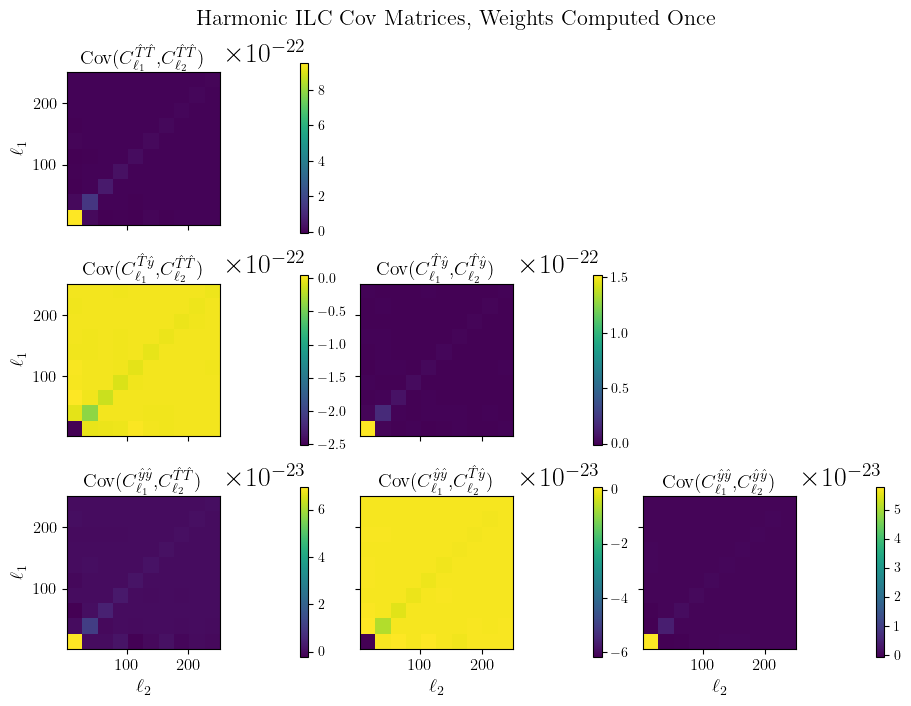

In [62]:
plot_corr(cov_weights_once_analytic, 'Harmonic ILC Cov Matrices, Weights Computed Once', compute_corr=False)

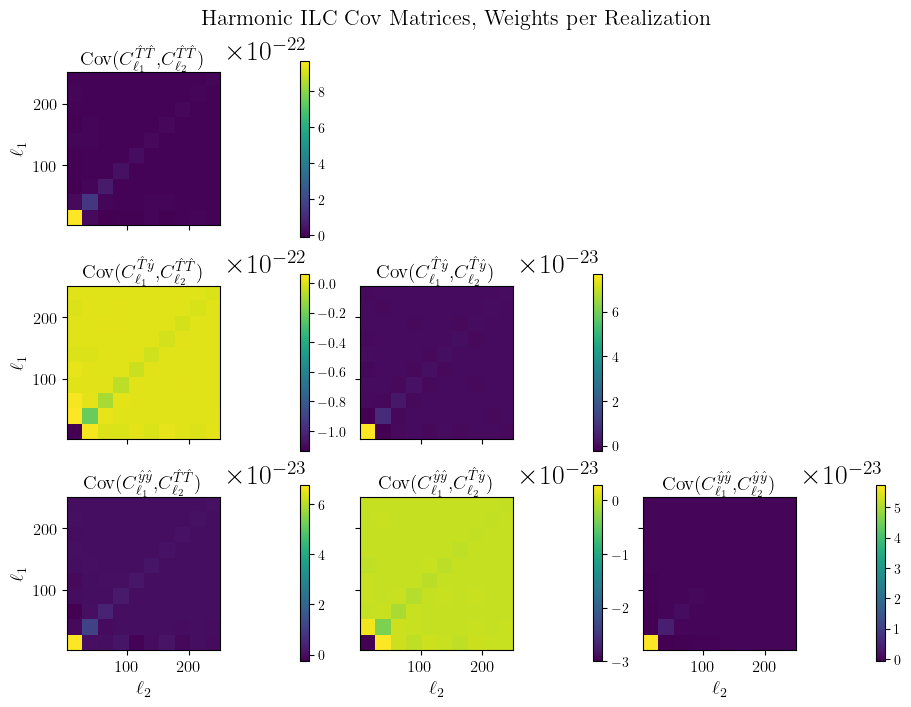

In [63]:
plot_corr(cov_weights_vary_analytic, 'Harmonic ILC Cov Matrices, Weights per Realization', compute_corr=False)

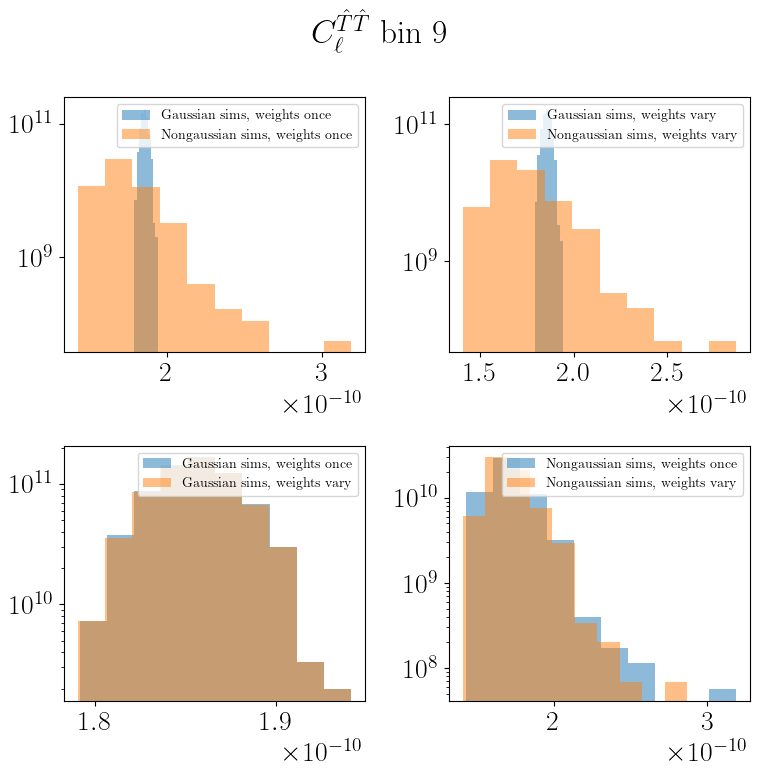

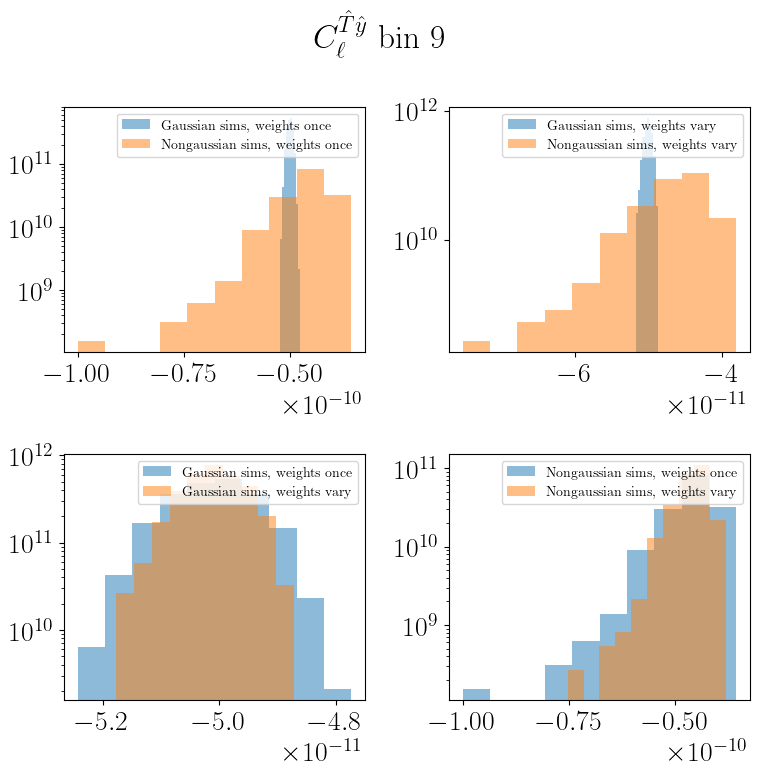

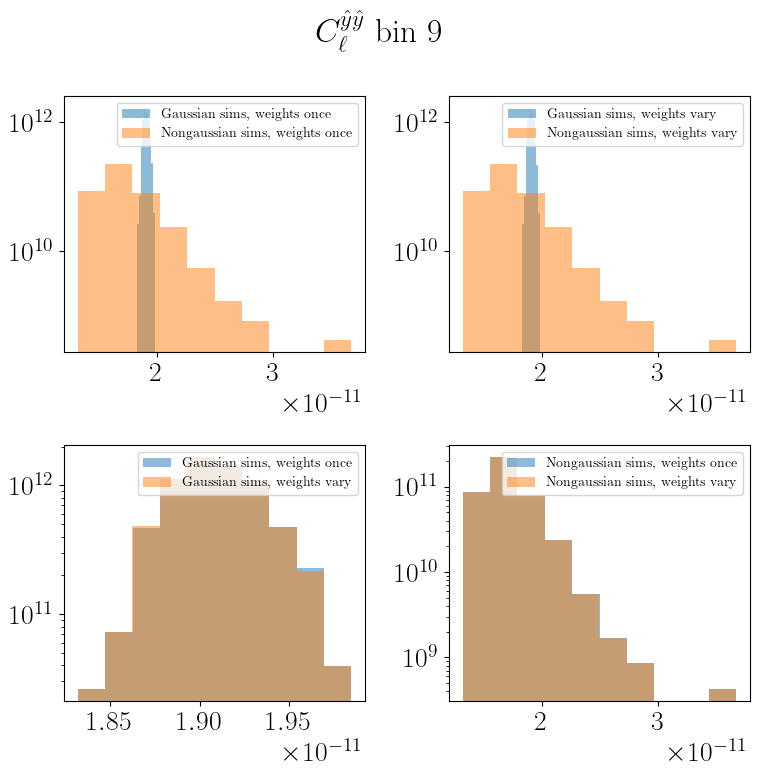

In [127]:
b = 9
for p,q in [(0,0), (0,1), (1,1)]:
    gaussian_sims_wts_once = pickle.load(open(f'{inp.output_dir}/HILC_tests_high_noise_keepcentralell_gaussian/Clpq_weights_once_analytic.p', 'rb'))[:,p,q,b]
    nongaussian_sims_wts_once = pickle.load(open(f'{inp.output_dir}/HILC_tests_high_noise_keepcentralell/Clpq_weights_once_analytic.p', 'rb'))[:,p,q,b]
    gaussian_sims_wts_vary = pickle.load(open(f'{inp.output_dir}/HILC_tests_high_noise_keepcentralell_gaussian/Clpq_weights_vary_analytic.p', 'rb'))[:,p,q,b]
    nongaussian_sims_wts_vary = pickle.load(open(f'{inp.output_dir}/HILC_tests_high_noise_keepcentralell/Clpq_weights_vary_analytic.p', 'rb'))[:,p,q,b]

    fig, axs = plt.subplots(2,2, figsize=(8,8))
    axs = axs.flatten()
    for i in range(4):
        plt.axes(axs[i])
        if i ==0: 
            plt.hist(gaussian_sims_wts_once, density=True, alpha=0.5, label='Gaussian sims, weights once')
            plt.hist(nongaussian_sims_wts_once, density=True, alpha=0.5, label='Nongaussian sims, weights once')
            plt.yscale('log')
            # plt.xscale('log')
            plt.legend(fontsize=10)
        elif i == 1:
            plt.hist(gaussian_sims_wts_vary, density=True, alpha=0.5, label='Gaussian sims, weights vary')
            plt.hist(nongaussian_sims_wts_vary, density=True, alpha=0.5, label='Nongaussian sims, weights vary')
            plt.yscale('log')
            # plt.xscale('log')
            plt.legend(fontsize=10)
        elif i==2:
            plt.hist(gaussian_sims_wts_once, density=True, alpha=0.5, label='Gaussian sims, weights once')
            plt.hist(gaussian_sims_wts_vary, density=True, alpha=0.5, label='Gaussian sims, weights vary')
            plt.yscale('log')
            plt.legend(fontsize=10)
        else:
            plt.hist(nongaussian_sims_wts_once, density=True, alpha=0.5, label='Nongaussian sims, weights once')
            plt.hist(nongaussian_sims_wts_vary, density=True, alpha=0.5, label='Nongaussian sims, weights vary')
            plt.yscale('log')
            plt.legend(fontsize=10)
        if p==q==0:
            spectra_str = r'$C_\ell^{{\hat{T}}\hat{T}}$'
        elif p==q==1:
            spectra_str = r'$C_\ell^{{\hat{y}}\hat{y}}$'
        else:
            spectra_str = r'$C_\ell^{{\hat{T}}\hat{y}}$'
        plt.suptitle(spectra_str+f' bin {b}')
        plt.tight_layout()

        
        
        